In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html



In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 
import os

In [ ]:
img = image.load_img('/content/cat.18.jpg',target_size=(200,200))
import matplotlib.pyplot as plt 
plt.imshow(img)

FileNotFoundError: ignored

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
  vertical_flip=False)

In [ ]:
print(type(img))
img = image.img_to_array(img)
print(type(img))

In [ ]:
img.shape

In [ ]:
input_batch = img.reshape(1,200,200,3) # 1 represent ..How many images

In [ ]:
!mkdir aug

In [ ]:
i=0 
for output in datagen.flow(input_batch,batch_size=1, save_to_dir ='aug'):
   #flow for image preprocessing 1 image and all images formed are save in aug directiory
        i = i+1
        if i==10:
          break

In [ ]:
img = image.load_img('/content/aug/_0_4120.png',target_size=(200,200))
img

**Data Augumentation on CAT_DOG**

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'codebloodediitg'
os.environ['KAGGLE_KEY']  = '6fd5bc645cc75742666bfca2c651cf39'
!kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:03<00:00, 242MB/s]
100% 812M/812M [00:03<00:00, 230MB/s]


In [ ]:
from zipfile import ZipFile 
file_name = '/content/dogs-vs-cats.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
from zipfile import ZipFile 
file_name = '/content/train.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
data_dir_list = os.listdir('/content/train')
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'  #new directory
os.mkdir(base_dir)

25000


In [ ]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
import shutil

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
import cv2 
import os 
import random 
import numpy as np 

In [ ]:
mydir = r'/content/cats_and_dogs_small/train'
categories = ['cats', 'dogs']

In [ ]:
data = []
for i in categories:
  folder_path = os.path.join(mydir,i)
  if i=='cats':
      label=0
  else:
      label=1
  for j in os.listdir(folder_path):
    img_path = os.path.join(folder_path,j)  #print(img_path) 
    img = cv2.imread(img_path)   #plt.imshow(img)  ->img will show
    img = cv2.resize(img,(150,150)) # resize becuase every image has different size
    data.append([img, label])
  

In [ ]:
import random 
random.shuffle(data)

X =[]
y =[]

for features , labels in data:
   X.append(features)
   y.append(labels)

In [ ]:
X = np.array(X)
y = np.array(y)
X = X/255


In [ ]:
from keras import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu', input_shape =(150,150,3) )) 
# or directly write  Conv2D(64,(3,3)) instead of Conv2D(64,kernel_size = (3,3)
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics =['accuracy']  )

In [ ]:
history =model.fit(X,y, epochs=5, validation_split=0.2)

Epoch 1/5
50/50 [==============================] - 92s 2s/step - loss: 0.7651 - accuracy: 0.5075 - val_loss: 0.7059 - val_accuracy: 0.4575
Epoch 2/5
50/50 [==============================] - 91s 2s/step - loss: 0.7012 - accuracy: 0.5206 - val_loss: 0.6882 - val_accuracy: 0.6000
Epoch 3/5
50/50 [==============================] - 88s 2s/step - loss: 0.6916 - accuracy: 0.6031 - val_loss: 0.6494 - val_accuracy: 0.6675
Epoch 4/5
50/50 [==============================] - 99s 2s/step - loss: 0.6434 - accuracy: 0.6525 - val_loss: 0.6420 - val_accuracy: 0.6625
Epoch 5/5
50/50 [==============================] - 90s 2s/step - loss: 0.5996 - accuracy: 0.6837 - val_loss: 0.7415 - val_accuracy: 0.5400


In [ ]:
from keras.preprocessing.image import ImageDataGenerator 


In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/cats_and_dogs_small/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/cats_and_dogs_small/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu', input_shape =(150,150,3) )) 
# or directly write  Conv2D(64,(3,3)) instead of Conv2D(64,kernel_size = (3,3)
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics =['accuracy']  )

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
125/125 [==============================] - 135s 1s/step - loss: 0.7462 - accuracy: 0.5235 - val_loss: 0.6651 - val_accuracy: 0.5875
Epoch 2/5
125/125 [==============================] - 130s 1s/step - loss: 0.6860 - accuracy: 0.5820 - val_loss: 0.6260 - val_accuracy: 0.6338
Epoch 3/5
125/125 [==============================] - 128s 1s/step - loss: 0.6497 - accuracy: 0.6610 - val_loss: 0.5986 - val_accuracy: 0.6612
Epoch 4/5
125/125 [==============================] - 131s 1s/step - loss: 0.6180 - accuracy: 0.6775 - val_loss: 0.6172 - val_accuracy: 0.6538
Epoch 5/5
125/125 [==============================] - 128s 1s/step - loss: 0.5774 - accuracy: 0.7035 - val_loss: 0.5875 - val_accuracy: 0.6837


In [ ]:
!mkdir -p saved_model
model.save('cat_dog_model1.h5') 

**Transfer Learning**

In [ ]:
# https://machinelearningknowledge.ai/popular-image-classification-models-in-imagenet-challenge-ilsvrc-competition-history/

In [ ]:
from keras.applications.vgg16 import VGG16

**method 1 direct predict**

In [ ]:
model = VGG16()

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

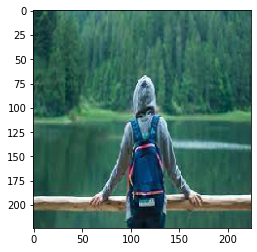

In [ ]:
import matplotlib.pyplot as plt 
img = image.load_img('/content/download.jpg', target_size=(224,224))
plt.imshow(img)

In [ ]:
img = image.img_to_array(img)
img = img.reshape((1,224,224,3))
y_pred = model.predict(img)    
print(y_pred)             

[[5.00750463e-09 1.13036225e-09 2.93685769e-08 1.47878199e-09
  1.24855388e-08 3.43465117e-10 2.10032131e-10 1.35242599e-08
  1.64243943e-08 9.08450914e-08 1.97639216e-09 1.33038043e-07
  3.43860563e-07 8.55476756e-09 3.80049663e-08 8.46274872e-09
  8.88832972e-08 1.16119701e-08 1.60802804e-09 9.89461668e-09
  1.19858479e-09 1.15725307e-07 2.06070148e-08 3.03700389e-08
  2.24161001e-09 1.50485596e-10 1.39842067e-08 4.64165290e-10
  1.55589135e-11 8.36264391e-08 1.35115750e-08 6.35244604e-08
  1.28509257e-08 1.37718601e-07 1.10609193e-08 7.12813053e-09
  1.14169353e-07 1.03976461e-09 1.47458550e-07 2.05034056e-07
  3.89059733e-06 4.68871697e-09 1.59655841e-07 9.39910592e-07
  3.07459125e-08 1.55430389e-08 4.48568983e-07 2.05949342e-04
  1.64355038e-06 1.05065201e-08 4.55048195e-08 7.28552891e-07
  3.28995764e-09 2.63357919e-10 1.58612035e-09 2.42811950e-07
  2.13457696e-10 8.72353578e-11 8.08883893e-09 4.14947685e-08
  1.86075042e-07 1.27086054e-07 5.55002018e-08 3.40812591e-07
  3.2501

In [ ]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred,top=1)

[[('n02777292', 'balance_beam', 0.8014527)]]

In [ ]:
model.save('cat_dog_vgg16.h5')

**method 2 change last layer**

In [ ]:
from keras.applications.vgg16 import VGG16


In [ ]:
vgg16 = VGG16()

In [ ]:
type(vgg16)  #it is fuctional type , not sequential 

keras.engine.functional.Functional

In [ ]:
from keras import Sequential
model = Sequential()

In [ ]:
for layer in vgg16.layers[:-1]:
  model.add(layer)

In [ ]:
#freeze the layers , so weights of these layer does not change 
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
#add last layer  (dense layer)
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5


InvalidArgumentError: ignored